# Mobile App Review Porject
## Initial Statistics

In [19]:
# import libraries
import pandas as pd
import numpy as np
import glob
import missingno as msno
import string
import csv

In [15]:
path='/Users/jasminechen/Module 3/542_project/'
os.chdir(path)
all_dir = os.listdir()

In [17]:
# combine review files 
reviews_list = []

for each_dir in all_dir:
    files = glob.glob(os.path.join(path+str(each_dir), '*_newest_*.csv'))
    reviews_list = reviews_list + files
    
reviews_df = []
for i in range(len(reviews_list)):
    reviews_df.append(str(reviews_list[i][reviews_list[i].rfind("/")+1:-4]))
    reviews_df[i] = pd.read_csv(reviews_list[i])
    
    date = reviews_list[i][reviews_list[i].rfind('/')+1:reviews_list[i].rfind('/')+11]
    category = reviews_list[i][reviews_list[i].rfind('/')+1:][:-9][reviews_list[i][reviews_list[i].rfind('/')+1:][:-9].rfind('TOP_FREE_')+9:]
    
    # adding date column to the dataframe
    reviews_df[i]['fileDate'] = date
    # adding app category column to the dataframe
    reviews_df[i]['appCategory'] = category.replace('_',' ')
    
full_data_reviews = pd.concat(reviews_df)    

In [20]:
# combine details files 

details_list = []

for each_dir in all_dir:
    files = glob.glob(os.path.join(path+str(each_dir), '*_all_detailed_*.csv'))
    details_list = details_list + files

details_df = []

for i in range(len(details_list)):
    details_df.append(str(details_list[i][details_list[i].rfind("/")+1:-4]))
    with open(details_list[i]) as infile:
        reader = csv.reader(infile)
        headers = next(reader)
    header_indices = [i for i, item in enumerate(headers) if item]
    details_df[i] = pd.read_csv(details_list[i], usecols=header_indices)
    
    # slicing out date from the file name
    date = details_list[i][details_list[i].rfind('/')+1:details_list[i].rfind('/')+11]
    # slicing out app category from the file name
    category = details_list[i][details_list[i].rfind('/')+1:][:-9][details_list[i][details_list[i].rfind('/')+1:][:-9].rfind('TOP_FREE_')+9:]
    
    # adding date column to the dataframe
    details_df[i]['fileDate'] = date
    # adding app category column to the dataframe
    details_df[i]['appCategory'] = category.replace('_',' ')
    
    
full_data_details = pd.concat(details_df)

full_data_details['appTitle_original'] = full_data_details['appTitle']
full_data_details['appTitle'] = full_data_details['appTitle'].str.lower()

/Users/jasminechen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



### Drop duplicates and show the number of  unique review records

In [22]:
unique_reviews = full_data_reviews.drop_duplicates(subset = ['appTitle', 'userName', 'date', 'score', 'text'])
print(len(unique_reviews))

1445976


### How many unique apps are in the dataset? How many apps in each of the 8 specified app categories?

In [24]:
unique_reviews['appTitle_original'] = unique_reviews['appTitle']
unique_reviews['appTitle'] = unique_reviews['appTitle'].str.lower()
count_unique_apps = unique_reviews['appTitle'].nunique()
unique_apps = unique_reviews['appTitle'].unique()

print('Number of unique apps: ', count_unique_apps)

appsByCategory = unique_reviews[['appCategory','appTitle']].drop_duplicates().groupby('appCategory').count().reset_index()
appsByCategory

/Users/jasminechen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jasminechen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Number of unique apps:  86


,appCategory,appTitle
0,EDUCATION,10
1,ENTERTAINMENT,13
2,FAMILY,10
3,FINANCE,10
4,GAME ACTION,11
5,HEALTH AND FITNESS,10
6,LIFESTYLE,12
7,MUSIC AND AUDIO,11


### How many reviews exist in each of the eight app-categories?

In [26]:
reviewsByCategory = unique_reviews[['appCategory','score']].groupby('appCategory').count().reset_index()
reviewsByCategory.columns = ['Category', 'Number_of_Reviews']
reviewsByCategory

,Category,Number_of_Reviews
0,EDUCATION,128984
1,ENTERTAINMENT,226420
2,FAMILY,143707
3,FINANCE,185512
4,GAME ACTION,252872
5,HEALTH AND FITNESS,154168
6,LIFESTYLE,137350
7,MUSIC AND AUDIO,216963


### Based on the contentRating column in the details files for each app, what are the different contentRating groups in each app-category?

In [28]:
contentRatingByCategory = full_data_details[['appCategory','contentRating']].groupby(['appCategory','contentRating']).count().reset_index()
contentRatingByCategory

,appCategory,contentRating
0,EDUCATION,Everyone
1,ENTERTAINMENT,Everyone
2,ENTERTAINMENT,Mature 17+
3,ENTERTAINMENT,Teen
4,FAMILY,Everyone
5,FAMILY,Everyone 10+
6,FINANCE,Everyone
7,GAME ACTION,Everyone
8,GAME ACTION,Mature 17+
9,GAME ACTION,Teen


### How many apps exist in each of these contentRating-sub-groups in each app-category?

In [29]:
appsContentCcategory = full_data_details[['appCategory','contentRating','appTitle']].drop_duplicates().groupby(['appCategory','contentRating']).count().reset_index()
appsContentCcategory.columns = ['appCategory', 'contentRating', 'Number_of_Apps']
appsContentCcategory

,appCategory,contentRating,Number_of_Apps
0,EDUCATION,Everyone,10
1,ENTERTAINMENT,Everyone,4
2,ENTERTAINMENT,Mature 17+,1
3,ENTERTAINMENT,Teen,8
4,FAMILY,Everyone,7
5,FAMILY,Everyone 10+,3
6,FINANCE,Everyone,10
7,GAME ACTION,Everyone,5
8,GAME ACTION,Mature 17+,2
9,GAME ACTION,Teen,4


### How many reviews in each contentRating-sub-groups in each app-category?

In [32]:
uniqueContentApps = full_data_details[['contentRating','appTitle']].drop_duplicates()

# 'Unicorn Slime Maker and Simulator' was under 'Teen' earlier i.e. on 13-03-2019 and on all dates after that it was 'Everyone'
# consider 'Everyone' for this app
uniqueContentApps = uniqueContentApps[(uniqueContentApps['contentRating'] != 'Teen') | (uniqueContentApps['appTitle'] != 'Unicorn Slime Maker and Simulator')]

# merge contentRating in the reviews dataset
unique_reviews = unique_reviews.merge(uniqueContentApps, how = 'left', left_on = 'appTitle', right_on = 'appTitle')

# using score for calculating reviews since its value is available for all the rows
reviewsContentCategory = unique_reviews[['appCategory','contentRating','score']].groupby(['appCategory','contentRating']).count().reset_index()
reviewsContentCategory.columns = ['appCategory','contentRating', 'Number_of_Reviews']
reviewsContentCategory

,appCategory,contentRating,Number_of_Reviews
0,EDUCATION,Everyone,87861
1,ENTERTAINMENT,Everyone,14377
2,ENTERTAINMENT,Mature 17+,7278
3,ENTERTAINMENT,Teen,161863
4,FAMILY,Everyone,58645
5,FAMILY,Everyone 10+,48107
6,FINANCE,Everyone,141158
7,GAME ACTION,Everyone,87560
8,GAME ACTION,Mature 17+,29360
9,GAME ACTION,Teen,92577


## Text Pre-processing

Apply the following on the text column.
- Remove the non-ASCII characters.
- Remove punctuations.
- Remove multiple characters if they occur more than 2 times continuously. Check your results so
that it does not change words such as HELLO that has 2 Ls.
7. Should we remove the reviews that contain two or less number of words?  
    a. Justify your answers.  
    b. Can we remove the reviews with two or less words for some score-sub-groups and keep
    them in the other ones? E.g. if the review has score 1, we should remove such reviews, but
    we should keep them if the rating is 5. Justify your answers.  
- Remove the reviews that have two or less number of words.

In [45]:
import nltk
from nltk.stem import PorterStemmer
import re
import string

In [46]:
unique_reviews['text1'] = unique_reviews['text']
unique_reviews['text1']  = unique_reviews['text1'].astype(str)

# removing non ascii words
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+','', text)

# removing punctuations
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# removing multiple characters more than twice
def remove_continuous(text):
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

# removing extra whitespaces from data
def remove_spaces(text):
    text = re.sub(r'\s\s+', ' ', text)
    return text.strip()


In [47]:
unique_reviews['text1'] = unique_reviews['text1'].map(remove_non_ascii)
unique_reviews['text1'] = unique_reviews['text1'].map(remove_punctuation)
unique_reviews['text1'] = unique_reviews['text1'].map(remove_continuous)
unique_reviews['text1'] = unique_reviews['text1'].map(remove_spaces)

## Analyzing Each Category

### How many reviews are therefore for each score? 

In [48]:
reviewsByScore = pd.DataFrame(unique_reviews.groupby('score')['text'].count())
reviewsByScore.columns = ['Number of Reviews']
reviewsByScore

,Number of Reviews
score,
1,347082
2,80968
3,122651
4,250254
5,1718629


### How many apps exist in each score-sub-group?

In [50]:
appsByScore=pd.DataFrame(unique_reviews.groupby('score')['appTitle'].nunique())
appsByScore.columns =["Number of Apps"]
appsByScore

,Number of Apps
score,
1,86
2,86
3,86
4,86
5,86


### Compare the number of reviews for each score in a plot (normalizing the numbers)

In [51]:
reviewsByScore['Review_Normalize']=(reviewsByScore["Number of Reviews"]-reviewsByScore["Number of Reviews"].min())/(reviewsByScore["Number of Reviews"].max()-reviewsByScore["Number of Reviews"].min())
reviewsByScore

,Number of Reviews,Review_Normalize
score,,
1,347082,0.162496
2,80968,0.000000
3,122651,0.025453
4,250254,0.103371
5,1718629,1.000000


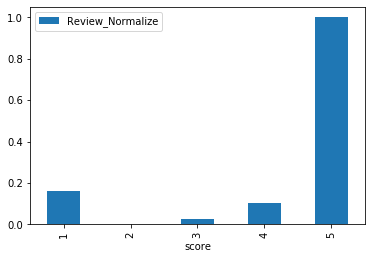

In [54]:
import matplotlib.pyplot as plt
reviewsByScore['score']=reviewsByScore.index
reviewsByScore.plot.bar(x='score',y='Review_Normalize')
plt.show()

### What is the average length of the reviews in each score-sub-group?

In [55]:
unique_reviews['reviewLength']=unique_reviews['text1'].str.len()
avglenByScore=pd.DataFrame(unique_reviews.groupby('score')['reviewLength'].mean())
avglenByScore

,reviewLength
score,
1,102.524131
2,126.944413
3,94.105928
4,63.315972
5,36.124869


### Compare the average length of reviews in each score-sub-group in the 8 app categories

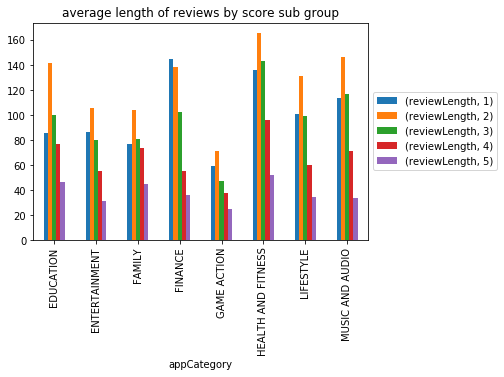

In [57]:
import matplotlib.pyplot as plt
avglenByScoreApp= pd.DataFrame(unique_reviews.groupby(['appCategory','score'])['reviewLength'].mean())
avglenByScoreApp.unstack().plot(kind='bar',title="average length of reviews by score sub group")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Compare the number of reviews in each score-sub-group in the 8 app categories

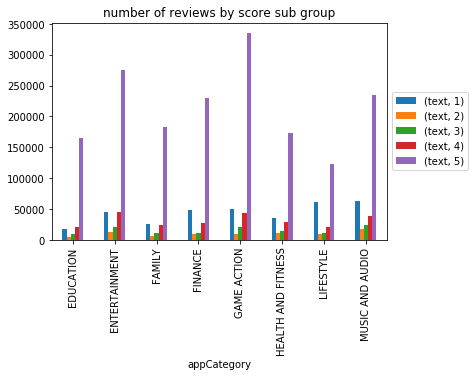

In [58]:
reviewsByScoreApp= pd.DataFrame(unique_reviews.groupby(['appCategory','score'])['text'].count())
reviewsByScoreApp.unstack().plot(kind='bar',title =  "number of reviews by score sub group")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Compare the number of apps in each score-sub-group in the 8 app categories

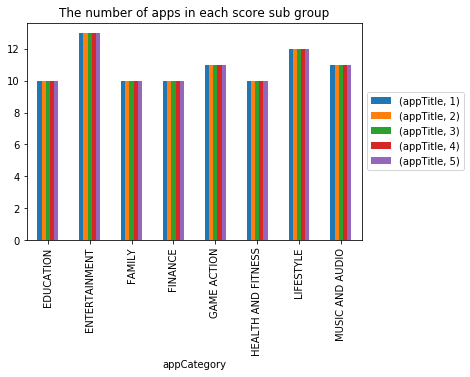

In [60]:
appsByScoreApp= pd.DataFrame(unique_reviews.groupby(['appCategory','score'])['appTitle'].nunique())
appsByScoreApp.unstack().plot(kind='bar',title = "The number of apps in each score sub group")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Is there any correlation between the length of the reviews and the score in each app-category?

In [62]:
pd.DataFrame(unique_reviews.groupby('appCategory')[['score','reviewLength']].corr().iloc[0::2,-1])

,,reviewLength
appCategory,,
EDUCATION,score,-0.211815
ENTERTAINMENT,score,-0.308545
FAMILY,score,-0.167289
FINANCE,score,-0.459384
GAME ACTION,score,-0.225748
HEALTH AND FITNESS,score,-0.342825
LIFESTYLE,score,-0.346035
MUSIC AND AUDIO,score,-0.402165


### Find the changes of the star rating and length of reviews during time for each app category

In [63]:
from dateutil.parser import parse
unique_reviews['date'] = unique_reviews['date'].apply(lambda x: parse(x))
unique_reviews['year'] = unique_reviews['date'].apply(lambda x: x.year)
unique_reviews['month'] = unique_reviews['date'].apply(lambda x: x.month)
unique_reviews['year'].value_counts()

2019    2336260
2018     157752
2017      14291
2016       7511
2015       3833
2014        102
Name: year, dtype: int64

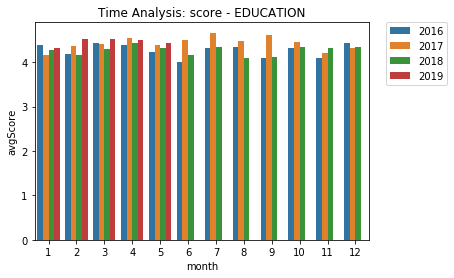

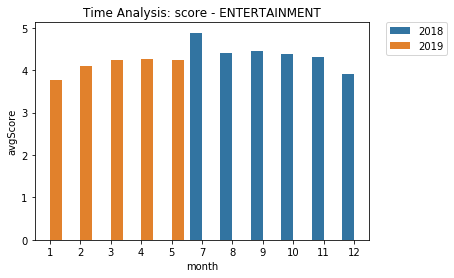

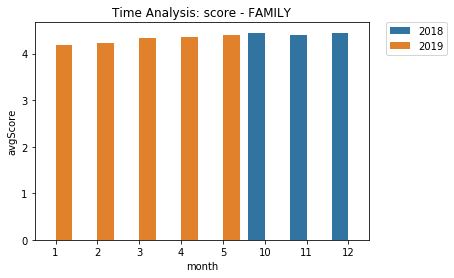

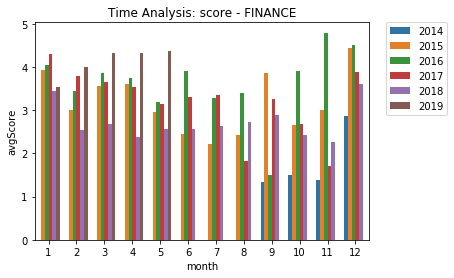

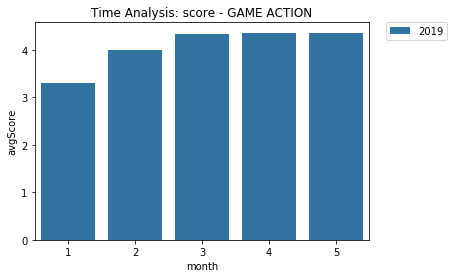

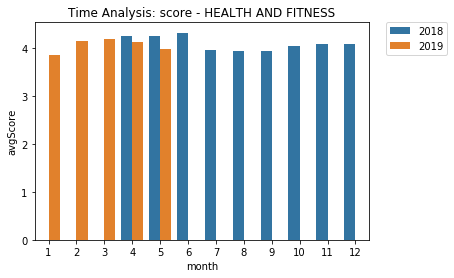

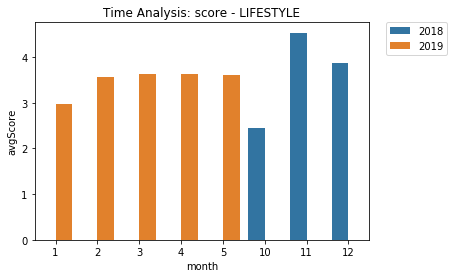

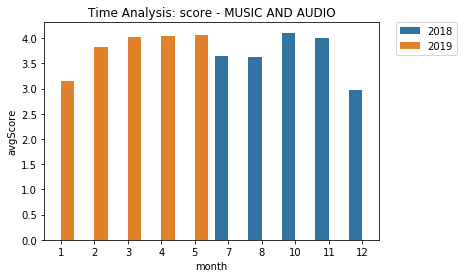

In [68]:
import seaborn as sns
# time analysis: score
avgscoreByCategoryTime = unique_reviews[['appCategory','year','month','score','reviewLength']].groupby(['appCategory','year','month']).mean().reset_index()

for category in avgscoreByCategoryTime['appCategory'].unique():
    plt.figure(list(avgscoreByCategoryTime['appCategory'].unique()).index(category))
    ax = sns.barplot(x='month', y='score', hue='year', data=avgscoreByCategoryTime[avgscoreByCategoryTime['appCategory']==category])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('month')
    plt.ylabel('avgScore')
    plt.title("Time Analysis: " +'score - '+str(category))

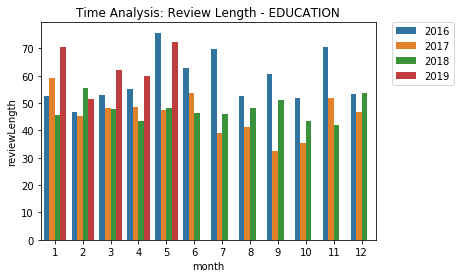

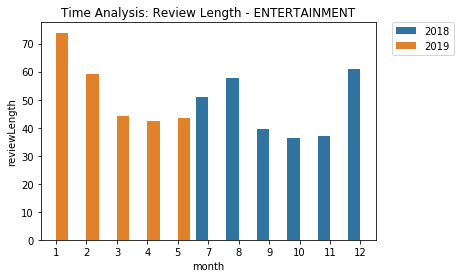

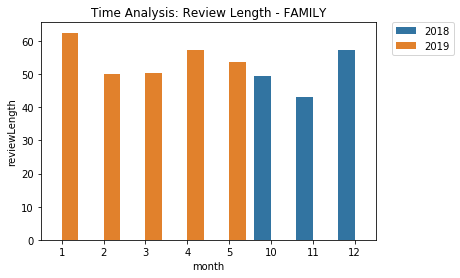

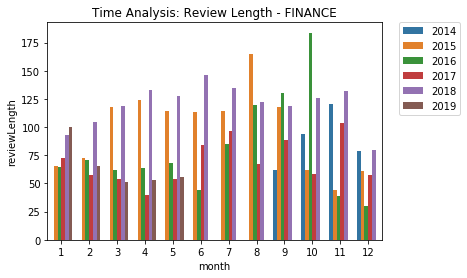

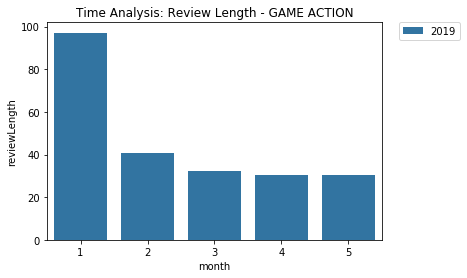

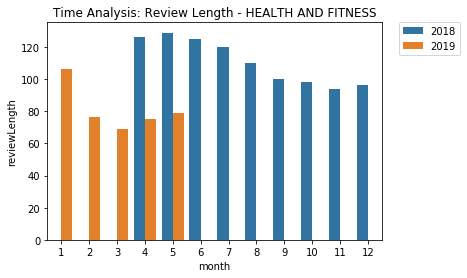

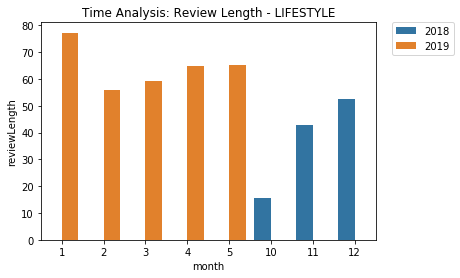

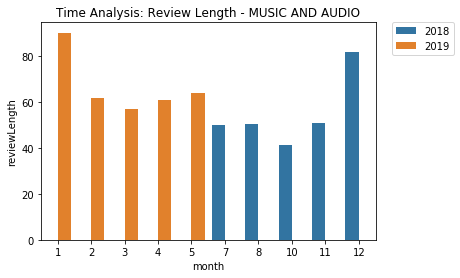

In [69]:
#time analysis: reivew length

for category in avgscoreByCategoryTime['appCategory'].unique():
    plt.figure(list(avgscoreByCategoryTime['appCategory'].unique()).index(category))
    ax = sns.barplot(x='month', y='reviewLength', hue='year', data=avgscoreByCategoryTime[avgscoreByCategoryTime['appCategory']==category])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('month')
    plt.ylabel('reviewLength')
    plt.title("Time Analysis: " +'Review Length - '+str(category))